In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

### Problem Statement:

Use QR decomposition to find the best-fit parameters $m$, ie:

$$ A = QR $$

where Q is an orthogonal ($Q^T Q = I$) matrix and $R$ is an upper triangular matrix. 

### Strategy:

The solution I found given a constant noise matrix in my written solutions was:

$$ m = R^{-1} Q^T d $$

So, it should be simple enough use an `np.linalg` function to return $A$'s QR decomposition and then return $m$, the best fit parameters.

In general, one can consider the noise matrix and find:

$$ A^T N^{-1} A m = A^T N^{-1} d $$

then:

$$ \implies R^T Q^T N^{-1} Q R m = R^T Q^T N^{-1} d $$

and finally:

$$ \implies m = (Q^T N^{-1} Q R)^{-1}Q^T N^{-1} d$$

But, for my coding here, I will consider only the simplified case.

First, define my reqular polynomial fitting, using linear algebra in our usual way

In [2]:
def reg_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    m = np.linalg.inv(a.T@a)@a.T@data
    return m

Next, define a QR decomposition fit, using the `numpy` library's handy `np.linalg.qr` to perform the QR decomposition

In [3]:
def qr_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

Try a simple fifth order polynomial fit on some random polynomial with both the regular and QR decomposition

In [4]:
n = 1000
order=5
x = np.linspace(-1,1,n)
y = x**5 + 3*x**2 + 0.38472*x + 803.3
data = y + np.random.randn(n)*1
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

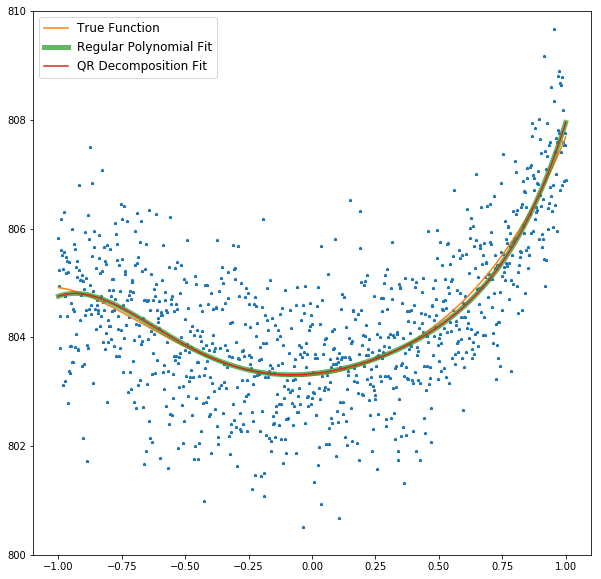

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit',linewidth=5,alpha=0.75)
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')
plt.show()

As expected, they perform remarkably similar. So similarly, in fact, that the two curves overlap one another! Now let's try to break the regular fit by doing a higher order polynomial, and see of QR decomposition is up to the task with a lower condition number.

In [6]:
order = 25
y = x**15 + 8*x**10 + 3*x**5 + 3*x**2 + 0.38472*x + 803.3
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

Now take a look at the fits

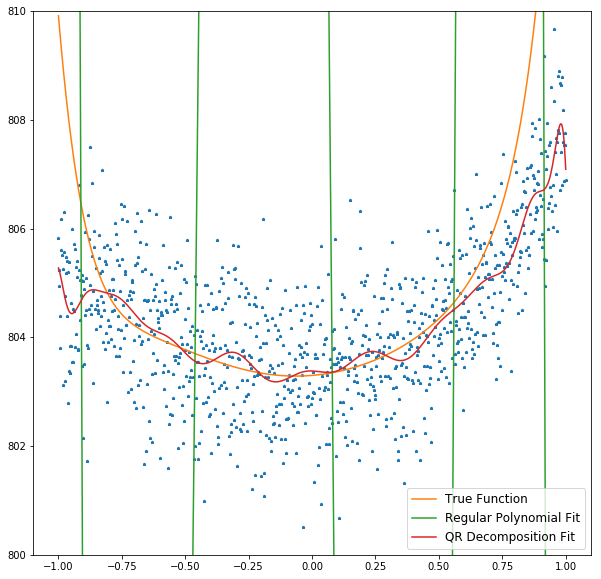

In [7]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit')
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')
plt.show()

The QR decomposition fit does a far better job of predicting the true function's value compared to the regular fit - I mean really, that regular polynomail fit is struggling.

# Problem 2

### Problem Statement:

Write a code that fits the function $e^x$ with Chebyshev polynomials, where the Chebyshev polynomial of n$^{th}$ order is given by:

$$ T_n = \cos(n\arccos(x)) $$

Note the recurrence relation for these polynomials:

$$ T_{n+1} = 2xT_n - T_{n-1} $$

$$ T_0 = 1 $$

$$ T_1 = x $$

Show that even at larger polynomial orders, Chebyshev fits remain stable compared to regular polynomial fits. Then compare a sixth order Chebyshev fit and a much higher order Chebyshev fit truncated to the order six term to see how the RMS and maximum errors compare.

### Strategy:

Define a simple Chebyshev polynomial fitting function 

In [8]:
def chebyshev_fit(x,data,order):
    a = np.zeros([n,order+1])
    a[:,0] = 1
    a[:,1] = x
    
    for i in range(1,order):
        a[:,i+1] = 2*x*a[:,i] - a[:,i-1]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

Fit an order six Chebyshev polynomial.

In [9]:
n = 10000
x = np.linspace(-1,1,n)
y = np.exp(x)
order = 6
m_ord_6 = chebyshev_fit(x,y,order)

fit_ord_6 = np.zeros(n)
for i in range(order+1):
    fit_ord_6 += m_ord_6[i]*np.cos(i*np.arccos(x))

Show the order six Chebyshev fit.

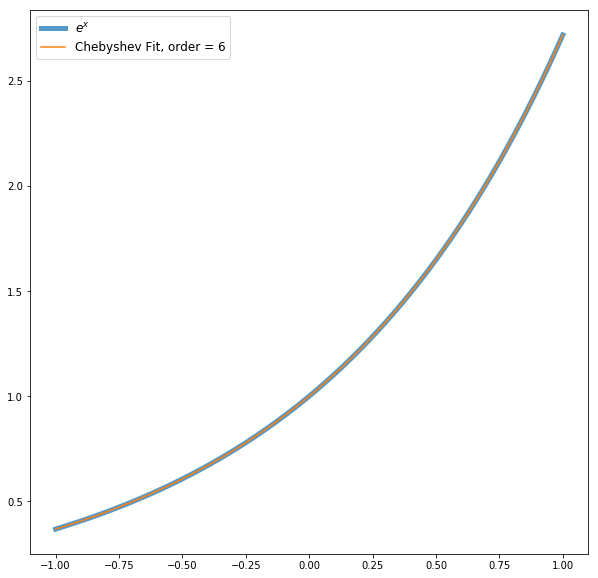

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$',linewidth=5,alpha=0.75)
plt.plot(x,fit_ord_6,label='Chebyshev Fit, order = %s' % (str(order)))
plt.legend(fontsize='large')
plt.show()

At the much higher order, the fit should remain stable. So, let's test that, and also create a truncated version of our higher order fit for use in comparing the RMS and max errors to the sixth order fit.

In [11]:
order = 200
m_ord_200 = chebyshev_fit(x,y,order)

fit_ord_200 = np.zeros(n)
for i in range(order+1):
    fit_ord_200 += m_ord_200[i]*np.cos(i*np.arccos(x))
    
fit_ord_200_cut = np.zeros(n)
for i in range(7):
    fit_ord_200_cut += m_ord_200[i]*np.cos(i*np.arccos(x))

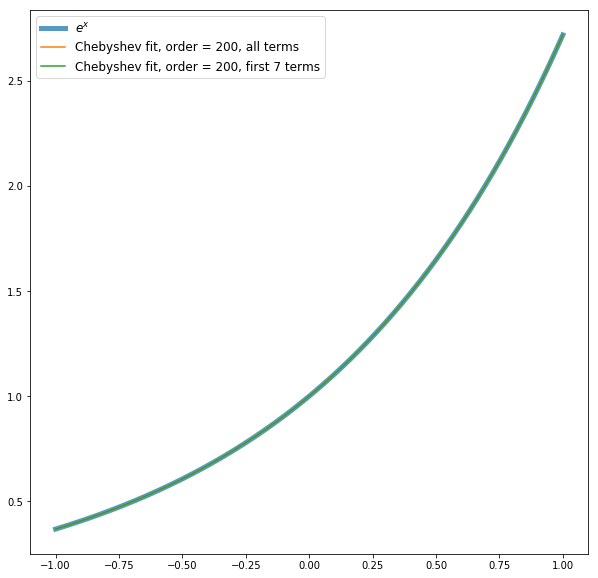

In [12]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$',lw=5,alpha=0.75)
plt.plot(x,fit_ord_200,label='Chebyshev fit, order = %s, all terms' % (str(order)))
plt.plot(x,fit_ord_200_cut,label='Chebyshev fit, order = %s, first 7 terms' % (str(order)))
plt.legend(fontsize='large')
plt.show()

Plot the residuals to get a sense of which fit is better: truncated or order 6

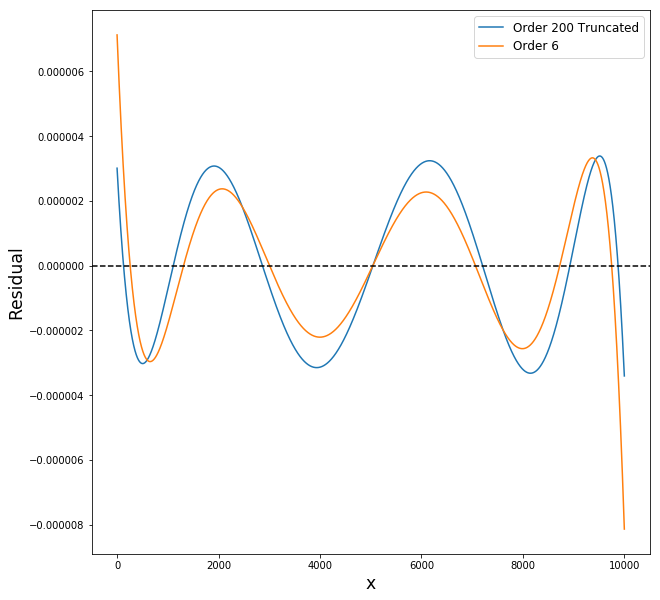

In [13]:
plt.figure(figsize=(10,10))
plt.plot(fit_ord_200_cut - y,label='Order 200 Truncated')
plt.plot(fit_ord_6 - y,label='Order 6')
plt.axhline(0,c='k',ls='--')
plt.legend(fontsize='large')
plt.ylabel('Residual',fontsize='xx-large')
plt.xlabel('x',fontsize='xx-large')
plt.show()

Now look at what the RMS error and max error of the fits are. By eye from the residuals it looks like the truncated fit has a higher RMS and the order 6 fit definitely has a higher maximum error.

In [14]:
RMS_err_6 = np.std(fit_ord_6 - y)
max_err_6 = (abs(fit_ord_6 - y)).max()
RMS_err_cut = np.std(fit_ord_200_cut - y)
max_err_cut = (abs(fit_ord_200_cut - y)).max()

print(RMS_err_6, 'RMS order 6')
print(max_err_6, 'Max order 6')
print(RMS_err_cut, 'RMS truncated')
print(max_err_cut, 'Max truncated')

1.9728492566435777e-06 RMS order 6
8.140894895536377e-06 Max order 6
2.257689765636461e-06 RMS truncated
3.409262363973653e-06 Max truncated


Based on the terms we ignored, we would expect the max RMS error to be about the sum of the coefficients for the terms we ignored in the high order fit (since the high order fit essentially perfectly fits the data, and the values of the Chebyshev polynomials are bound by $\pm 1$, so the worst case scenario is all truncated terms lining up on either $1$ or $-1$). Let's check that the sum of the truncated terms and the maximum error of the truncated polynomial are comparable:

In [15]:
truncated_terms = 0
for i in range(7,201):
    truncated_terms += abs(m_ord_200[i])

In [16]:
truncated_terms/max_err_cut

1.0000000124055748

The sum of the absolute value of truncated terms is slightly larger than our maximum error for the fit, which is to be expected based on our argument before.

Ratio of `RMS_err_cut` over `RMS_err_6` should be 1.15 if everything was done correctly

In [17]:
RMS_err_cut/RMS_err_6

1.1443802703291606

Close! Ratio of `max_err_cut` to `max_err_6` should less than 0.5 if everything was done correctly

In [18]:
max_err_cut/max_err_6

0.4187822601472154

Looking good!

# Problem 3

### Problem Statement:

Use the fact that introducing a rotation applied to both the data and the noise leaves $\chi^2$ unchanged, generate realizations of random noise with correlations in them. 

### Strategy:

Perform Eigendecomposition on the correlation matrix $C$, ie:

$$C = V\Lambda V^T$$

where $V$ is a matrix with the eigenvectors of $C$ as columns and $\Lambda$ is a matrix with the eigenvalues of $C$ on the diagonals and 0 elsewhere.

$$\chi^2 = (d_i - m_i)^T N^{-1} (d_i - m_i)$$

If our data is JUST NOISE: $(d_i - m_i)$ becomes just the noise of the i'th data point:

$$ \chi^2 = n_i ^T N^{-1} n_i $$

For correlated noise, $N$ is some general matrix. Want to rotate this into a diagonal matrix. Can use eigenvalue decomposition:

$$ \chi^2 = n_i^T (V\Lambda V^T)^{-1} n_i$$

$$ \chi^2 = n_i^T (V^{T^{-1}} \Lambda^{-1} V^{-1}) $$

but $V^{-1} = V^T$:

$$ \chi^2 = n_i^T V \Lambda^{-1} V^T n_i $$

let $\tilde{n} = V^T n$

$$ \chi^2 = \tilde{n_i}^T \Lambda^{-1} \tilde{n_i} $$

If $\tilde{n_i} = \sqrt{eval_i}$ (because e-vals are variances)

Want to get $n$ back from $\tilde{n}$ because we want our correlated noise matrix: $n = V\tilde{n}$ 

I'm going to use the simple example noise matrix suggested, but in principle $N$ here can be any correlation matrix.

In [19]:
n = 50
N = np.ones([n,n]) + np.eye(n)

In [20]:
#For testing purposes
#N = np.random.randn(n,n)
#N = N.T@N

Using `eigh` as opposed to `eig` to avoid imaginary number weirdness: but are all noise matrices real and symmetric? Intuitively, I think so: correlations match symmetrically and I don't see any reason for non-real noise.

Also note `V[:,i]` is the eigenvector corresponding to eigenvalue i.

In [21]:
e_vals,V = np.linalg.eigh(N)
n_i_tilde = np.random.normal(scale=np.sqrt(abs(e_vals)))
n_i = V@n_i_tilde

Check that my noise looks correlated to some new mean

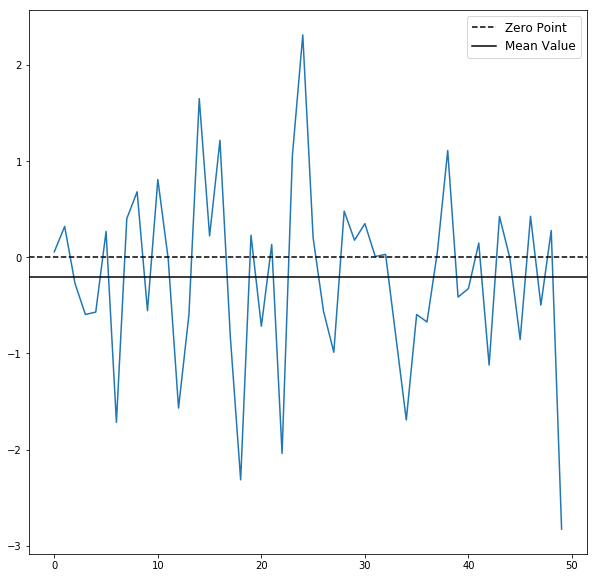

In [22]:
plt.figure(figsize=(10,10))
plt.plot(n_i)
plt.axhline(0,c='k',ls='--',label='Zero Point')
plt.axhline(n_i.mean(),c='k',label='Mean Value')
plt.legend(fontsize='large')
plt.show()

Now average this noise over many iterations (ie: $<d d^T>$) and see if it converges to the noise matrix:

In [23]:
num_iterations = 1000
d = []

for i in range(num_iterations):
    n_i_tilde = np.random.normal(scale=np.sqrt(abs(e_vals)))
    n_i = V@n_i_tilde
    d.append(np.outer(n_i,n_i.T))

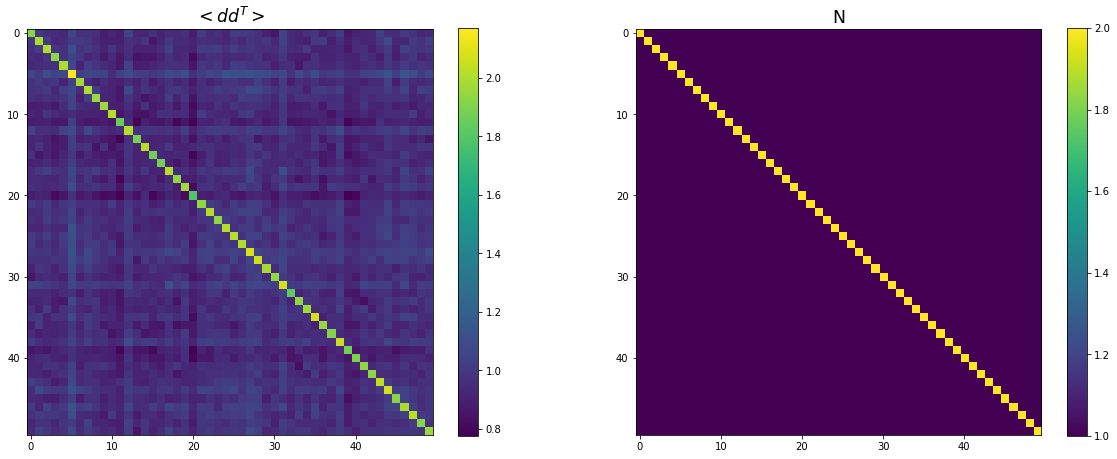

In [24]:
d_dT = np.average(d,axis=0)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
im1 = ax[0].imshow(d_dT)
im2 = ax[1].imshow(N)#,vmin=d_dT.min(),vmax=d_dT.max())
ax[0].set_title('$<d d^T>$',fontsize='xx-large')
ax[1].set_title('N',fontsize='xx-large')
fig.colorbar(im1,ax=ax[0],shrink=0.75)
fig.colorbar(im2,ax=ax[1],shrink=0.75)
plt.show()

Looks like it's fairly convergent! Let's check how the compare in terms of RMS difference:

In [25]:
print('Average error is %.3f out of an average value of %.3f.' % (np.mean(np.abs(d_dT - N)),np.mean(np.abs(N))))

Average error is 0.056 out of an average value of 1.020.


They deviate by a fairly small margin on average.

## Question 4

### Problem Statement:

Generate fake correlated noise using the function

$$ N_{ij} = a\exp{(-(i-j)^2/2\sigma^2)} + (1-a)\delta(i-j)$$

And find the error on a unit amplitude Gaussian.

### Strategy:

Use our formulation for the variance of our parameter fit $m$:

$$var(m) = <m m^T> = (A^T N^{-1} A)^{-1}$$

For some external reason we knew $N$ beforehand, so we can just say:

$$\sigma_m = \sqrt{(A^T N^{-1} A)^{-1}}$$

In [26]:
n = 1000
a = [0.1,0.5,0.9]
sigma = [5,50,500]

In [27]:
def noise_func(i,j,a,sigma):
    delta = np.zeros((n,n))
    delta[i==j] = 1
    return a*np.exp(-(i-j)**2/(2*sigma**2)) + (1-a)*delta

In [28]:
N = []
for i in range(len(a)):
    for j in range(len(a)):
        N.append(np.fromfunction(noise_func,(n,n),a=a[i],sigma=sigma[j]))

Produce the noise matrices for each pair of `a` and `sigma` and see what they look like

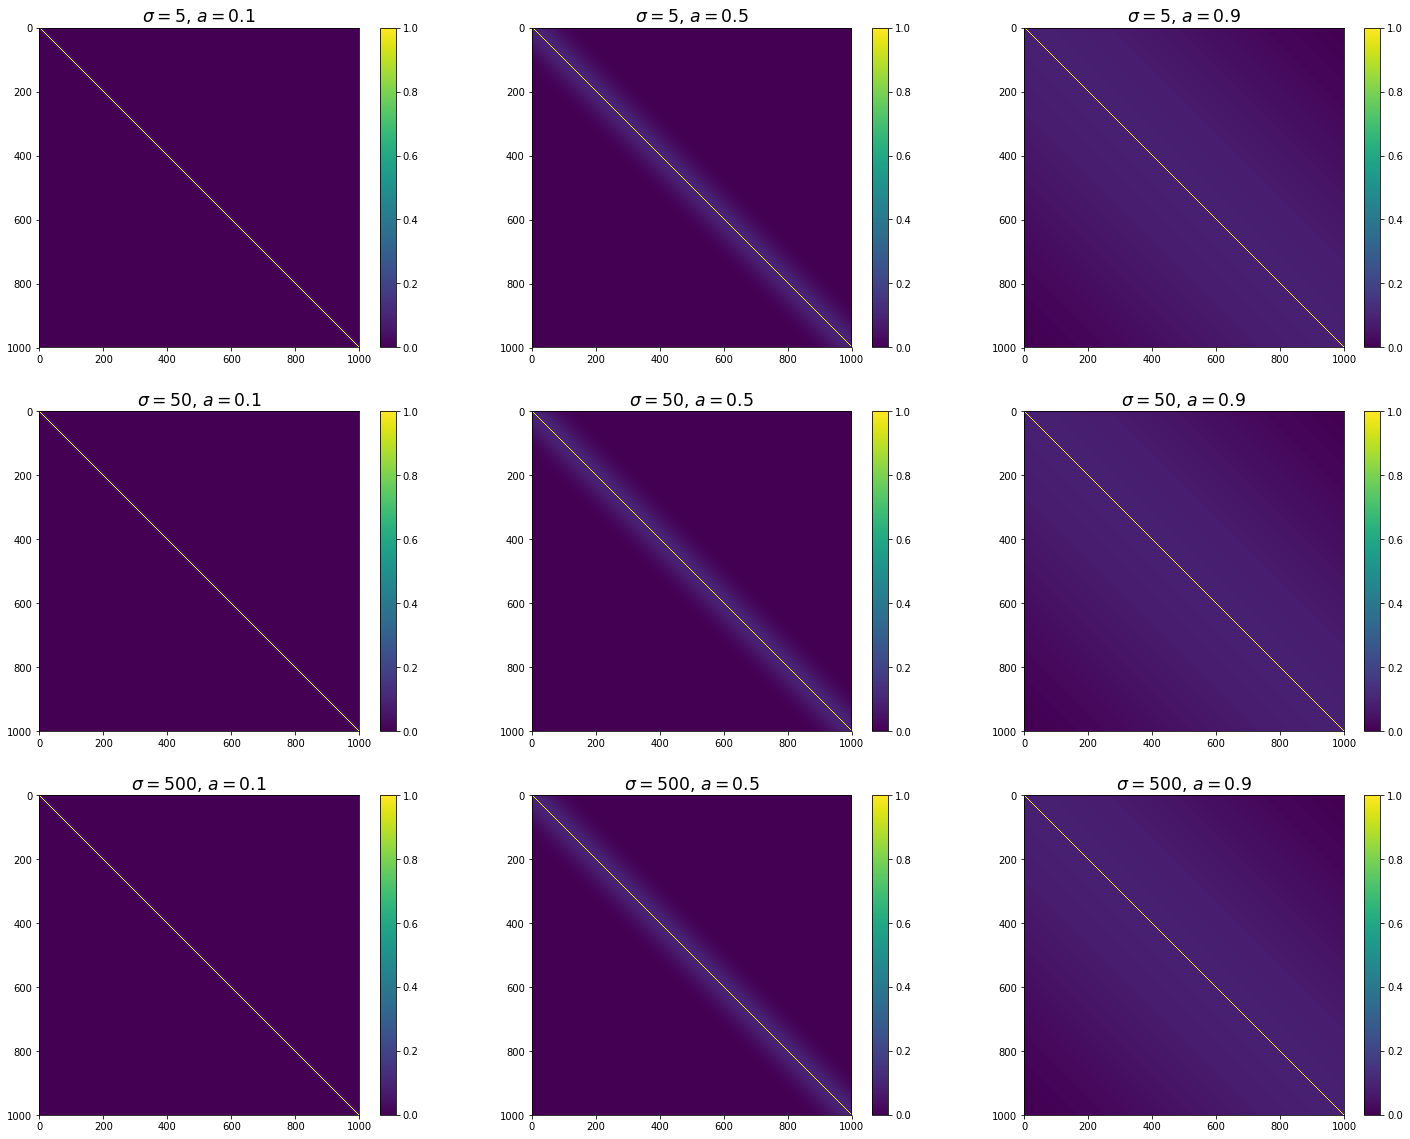

In [29]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(25,20))
im = []
for i in range(3):
    for j in range(3):
        im.append(ax[j,i].imshow(N[i]))
        fig.colorbar(im[i],ax=ax[j,i])
        ax[j,i].set_title('$\sigma = %.0f$, $a = %.1f$' % (sigma[j],a[i]),fontsize='xx-large')
plt.show()

Now make a unit gaussian pulse and fit the error for each noise matrix

In [30]:
def gaussian(x,mu,sigma,a):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [31]:
x = np.arange(0,1000)
#The data has an amplitude of 1
data = gaussian(x,500,50,1)
#The template must have an amplitude of 1 so the fit
#ends up giving an amplitude
A = gaussian(x,500,50,1)

In [32]:
def ampfit_err(A,N):
    #Just take the inverse power instead of matrix inverse
    #Because A.T@N^-1@A is a scalar
    return np.sqrt((A.T@np.linalg.inv(N)@A)**-1)

In [33]:
import pandas

In [34]:
err = np.zeros((3,3))
for i in range(9):
    err[i%3,int(i/3)] = ampfit_err(A,N[i])

Values of $a$ as the columns values and $\sigma$ as the row values, create a table of errors:

In [35]:
pandas.DataFrame(err,index=sigma,columns=a)

,0.1,0.5,0.9
5,0.155763,0.275999,0.357895
50,0.337745,0.714054,0.949932
500,0.127575,0.100664,0.048925


$a = 0.5$ and $\sigma = 50$ matches with the sanity check so I think I've done everything correctly. As $a$ (which corresponds to the strength of the correlations) increases, errors increase for $\sigma = (5, 50)$, but errors decrease for $\sigma = 500$. The worst error occurs for $\sigma = 50$ and $a = 0.9$. Notably, at $\sigma = 500$, the errors are lowest: since the timescale of correlations here large (half the timescale of the data), the points far away from each other know what the other is doing but not the points nearby, so the noise is much more constant in larger regions.

In [36]:
def gen_corr_noise(N):
    e_vals,V = np.linalg.eigh(N)
    n_tilde = np.random.normal(scale=np.sqrt(e_vals))
    n = V@n_tilde
    return n

In [37]:
noises = []
for i in range(len(N)):
    noises.append(gen_corr_noise(N[i]))

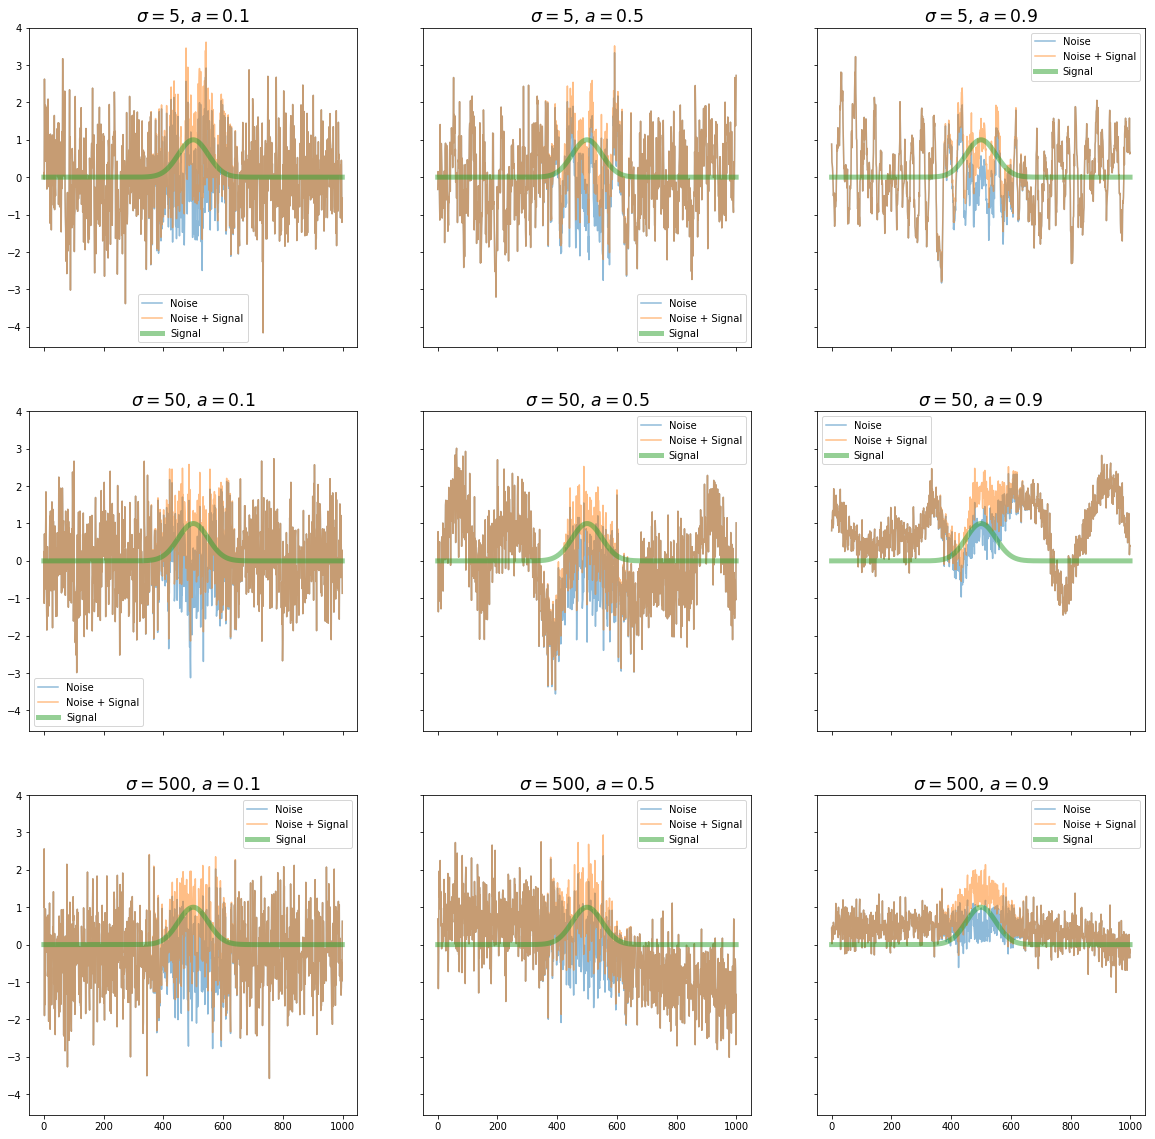

In [43]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,20),sharey=True,sharex=True)
for i in range(9):
    ax[i%3,int(i/3)].plot(noises[i],alpha=0.5,label='Noise')
    ax[i%3,int(i/3)].plot(data + noises[i],alpha=0.5,label='Noise + Signal')
    ax[i%3,int(i/3)].plot(data,alpha=0.5,lw=5,label='Signal')
    ax[i%3,int(i/3)].set_title('$\sigma = %.0f$, $a = %.1f$' % (sigma[i%3],a[int(i/3)]),fontsize='xx-large')
    ax[i%3,int(i/3)].legend()
plt.show()

From these noise realizations and checking the error bars, the kind of noise that is good is noise that has a characteristic correlation scale on the order of the scale of our signal. The worst kind of noise is strongly correlated noise with small characteristic scale: this noise ends up super spike-y, and gives us the worst error.